# DNA Promoter Classification using Logistic Regression

This project explores the classification of DNA sequences into 
Promoter (+) and Non-Promoter (-) classes using Logistic Regression.

## Biological Background

Promoters are DNA sequences that initiate transcription of a gene.
Identifying promoter regions is important in genomics and bioinformatics.

This dataset contains labeled promoter and non-promoter sequences.


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Load Dataset

In [3]:
df=pd.read_csv("promoters.data", header=None)
df.head()
df.columns=["label","id","sequence"]
df["label"]=df["label"].map({"+" : 1, "-" : 0})


df.head()

,label,id,sequence
0,1,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,1,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,1,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,1,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,1,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


Data Visualization


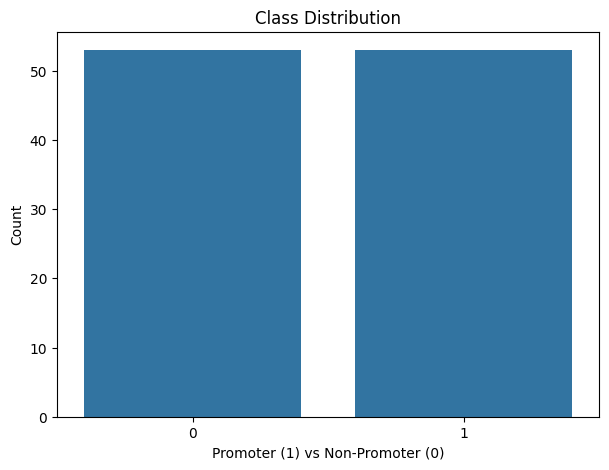

In [4]:
plt.figure(figsize=(7,5))
sns.countplot(x="label", data=df)

plt.xlabel("Promoter (1) vs Non-Promoter (0)")
plt.ylabel("Count")
plt.title("Class Distribution")

plt.show()


Encodind DNA Sequence

In [5]:
def encode_sequence(seq):
    mapping={"A":0, "C":1, "G":2, "T":3}
    seq=str(seq).strip()
    return [mapping[char.upper()]for char in seq]

X=df["sequence"].apply(encode_sequence).tolist()
y=df["label"]

DNA sequences are categorical (A, C, G, T).
We convert them into numerical format so the model can process them.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


The dataset is split into 80% training data and 20% testing data
to evaluate generalization performance.


In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

Logistic Regression is used for binary classification.
It estimates the probability that a sequence belongs to the promoter class.


In [8]:
pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.7727272727272727


The accuracy indicates how well the model distinguishes between 
promoter and non-promoter sequences.
